In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
%matplotlib inline


# load data
data = pd.read_csv('/Users/sinya/Downloads/TitlesWeight_6Month.csv',engine = 'python', names=['Words', 'Frequency','Weight'])
data.drop(labels=[0],axis=0, inplace = True) 
data['Weight'] = data['Weight'].astype(int)
data['Words'] = data['Words'].astype(str)
total_weight= sum(data['Weight'])


In [130]:
# build vocabular of most popular words in english
vocabular = [] 
with open('/Users/sinya/vocabular.txt', 'r', encoding='utf8') as f: 
    soup = BeautifulSoup(f)
    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    for line in text.splitlines():
        vocabular+=line.strip().split()

In [131]:
# build collections of words we need to delete

from nltk.corpus import stopwords
#nltk.download('stopwords')
english_stopwords = set(stopwords.words("english"))
common_words = set(vocabular)


In [132]:
# create a dictionary of words in Titles

from collections import defaultdict

words_freq = defaultdict(int)
total_weight = 0

for word in data['Words']:
    if str(word).lower() not in english_stopwords and str(word).lower() not in common_words and str(word).lower()!='nan':
        words_freq[str(word).lower()] = int(data[data['Words']==word]['Weight'])
        total_weight += int(data[data['Words']==word]['Weight'])
        
        



In [133]:
# overview of most popular words
top = [[value, key] for key, value in words_freq.items()]
top = sorted(top, key=lambda x:x[0], reverse=True)
top_20 = top[:20]
top_20

[[1493543, 'typeerror:'],
 [1368471, '(reading'],
 [664177, 'removed.'],
 [508306, 'cannot'],
 [338749, 'envelope'],
 [318361, ':'],
 [266026, "'id')"],
 [246769, "'map')"],
 [235141, '"error:0308010c:digital'],
 [235141, 'routines::unsupported"'],
 [228853, '<route>'],
 [223621, 'defined'],
 [212650, '×'],
 [203163, 'found:'],
 [190913, 'mincompilesdk'],
 [190402, '15'],
 [188684, '6'],
 [187954, "can't"],
 [187844, '(31)'],
 [183293, "dependency's"]]

In [134]:
tags=[['python',0],['javascript',0],['reactjs',0],['java',0],['android',0],['node.js',0],['c#',0],['flutter',0],['typescript',0],['html',0]]
for i in range(len(tags)):
    tags[i][1]=int(words_freq[tags[i][0]])


<BarContainer object of 10 artists>

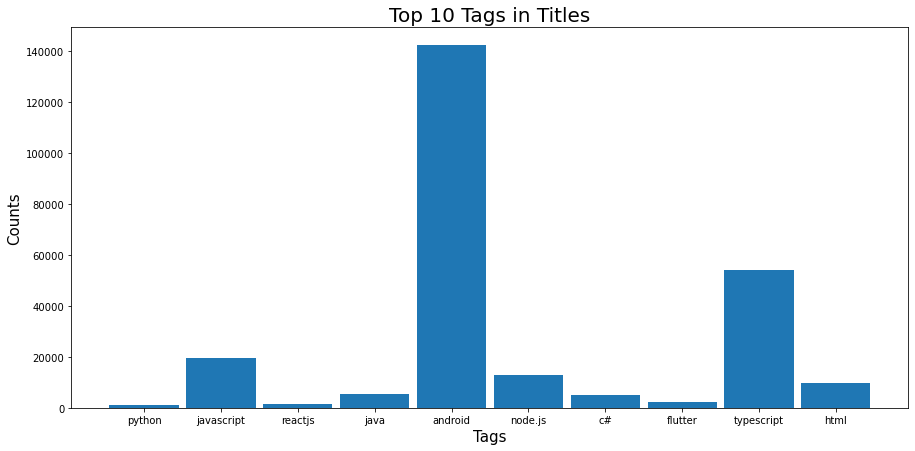

In [135]:
plt.figure(figsize=[15, 7])
plt.title('Top 10 Tags in Titles', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Tags', fontsize=15)
nums = [tags[i][0] for i in range(10)]
weights = [tags[i][1] for i in range(10)]
plt.bar(nums, weights, width=0.9)